In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [3]:
digits = load_digits()
X = digits.data
y = digits.target

In [4]:
print("Dataset shape:", X.shape)


Dataset shape: (1797, 64)


In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
components = [2, 10, 30, 50]
variance_ratios = []

for n in components:
    pca = PCA(n_components=n)
    pca.fit(X_scaled)
    variance_ratios.append(np.sum(pca.explained_variance_ratio_))

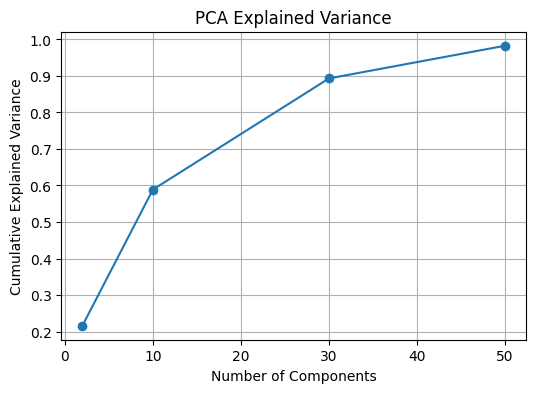

In [7]:
plt.figure(figsize=(6,4))
plt.plot(components, variance_ratios, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.grid(True)
plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

model_original = LogisticRegression(max_iter=5000)
model_original.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [9]:
y_pred_original = model_original.predict(X_test)
acc_original = accuracy_score(y_test, y_pred_original)

print("Original Dataset Accuracy:", acc_original)

Original Dataset Accuracy: 0.9703703703703703


In [10]:
pca_final = PCA(n_components=30)
X_reduced = pca_final.fit_transform(X_scaled)

Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X_reduced, y, test_size=0.3, random_state=42
)

In [11]:
model_reduced = LogisticRegression(max_iter=5000)
model_reduced.fit(Xr_train, yr_train)

yr_pred = model_reduced.predict(Xr_test)
acc_reduced = accuracy_score(yr_test, yr_pred)

In [12]:
print("Reduced Dataset Accuracy (30 components):", acc_reduced)

Reduced Dataset Accuracy (30 components): 0.9629629629629629


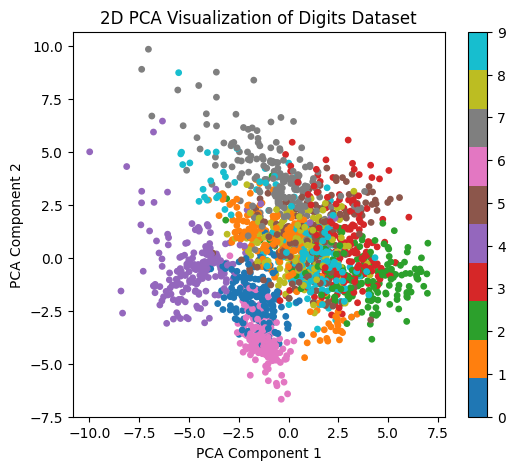

In [13]:
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
scatter = plt.scatter(X_2d[:,0], X_2d[:,1], c=y, cmap='tab10', s=15)
plt.colorbar(scatter)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("2D PCA Visualization of Digits Dataset")
plt.show()

In [14]:
print("\n--- Accuracy Comparison ---")
print("Without PCA :", acc_original)
print("With PCA    :", acc_reduced)


--- Accuracy Comparison ---
Without PCA : 0.9703703703703703
With PCA    : 0.9629629629629629
